# Assignment 1: plots, bar charts, and filtering

This assignment uses a dataset of all NYC restaurant inspection results from Jan. 1, 2019 - Aug. 30, 2019.  Download the file from Blackboard.  The original, unfiltered dataset is at [https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j).

Information about how restaurants are inspected and graded in NYC is here: https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf(https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf)

There are a lot of columns in this dataset.  To show them all when displaying the dataset, use the following code beforehand (once per notebook):
`pd.set_option('display.max_columns', None)`

All plots should have an appropriate title and axes labels.

1.  Plot a histogram to visualize the distribution of the inspection scores.  You should experiment with the number of bins to find a visualization that shows all major features of the distribution.  What do you notice about the distribution, and how do you think that fits with how restaurants are inspected?

2.  Plot a bar chart of the distribution of boroughs.  In which boroughs are the most/least restaurant inspections?

3.  Find the mean score for inspections made in January and the mean score for inspections made in July.  From these computations, does the mean score seem to depend on the month?  Why do you think this might be?

4.  Make a bar chart of the top 15 cuisine types in the dataset.

5.  How many different cuisine types are there in the dataset?  And what is the most common street?

# Edward Biswas

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [3]:
restaurants = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

In [4]:
restaurants.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board          float64
Council District         float64
Census Tract             float64
BIN                      float64
BBL                      float64
NTA                       object
dtype: object

In [5]:
restaurants.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50074557,FISH VILLAGE,Queens,2007,127TH ST,11356.0,6468307299,Chinese,01/02/2019,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,N,22.0,NaN,NaN,08/30/2019,Cycle Inspection / Initial Inspection,40.781449,-73.841413,407.0,19.0,91900.0,4099328.0,4.041720e+09,QN23
1,50086382,IL POSTO,Brooklyn,7409,AVENUE U,11234.0,7182414317,Italian,01/02/2019,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,29.0,NaN,NaN,08/30/2019,Pre-permit (Operational) / Initial Inspection,40.621321,-73.905154,318.0,46.0,69602.0,3237484.0,3.084150e+09,BK45
2,41258823,LITTLE CAESARS,Bronx,1888,WESTCHESTER AVENUE,10472.0,3476571722,Pizza,01/02/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,4.0,A,01/02/2019,08/30/2019,Cycle Inspection / Re-inspection,40.832928,-73.861964,209.0,18.0,7200.0,NaN,2.000000e+00,BX55
3,50002053,THE LOCAL,Queens,13-02,44TH AVENUE,11101.0,3477385251,American,01/02/2019,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,7.0,A,01/02/2019,08/30/2019,Cycle Inspection / Initial Inspection,40.749644,-73.947487,402.0,26.0,1900.0,4005221.0,4.004460e+09,QN31
4,50055374,FLORA BAR,Manhattan,945,MADISON AVE,10021.0,6317038780,American,01/02/2019,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,11.0,A,01/02/2019,08/30/2019,Cycle Inspection / Re-inspection,40.773450,-73.964199,108.0,4.0,13000.0,1041666.0,1.013890e+09,MN40


Plot a histogram to visualize the distribution of the inspection scores.

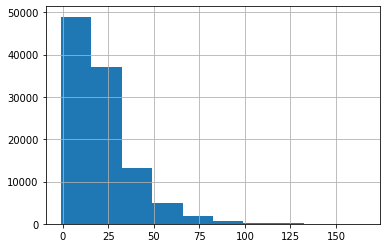

In [6]:
restaurants['SCORE'].hist()

You should experiment with the number of bins to find a visualization that shows all major features of the distribution.

Text(0, 0.5, '# of restaurants')

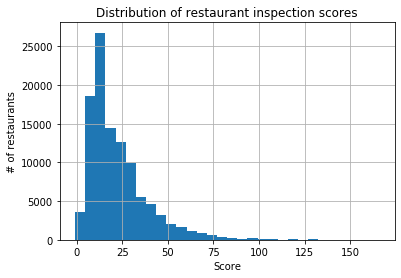

In [9]:
restaurants['SCORE'].hist(bins=30)
plt.title("Distribution of restaurant inspection scores")
plt.xlabel("Score")
plt.ylabel("# of restaurants")

What do you notice about the distribution, and how do you think that fits with how restaurants are inspected?

* The distribution shows majority of restaruants in NYC earned less than 50 on their inspected score. Restaruants with lower score recieve higher letter Grade, which means those restaruants meet the NYC health inspection requirements.

Plot a bar chart of the distribution of boroughs.

In [10]:
restaurants.describe(include = ["O"])

,DBA,BORO,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,NTA
count,110364,110364,110315,110364,110363,110364,110364,110364,109465,107996,107996,57134,55214,110364,110364,108816
unique,17130,6,6498,2927,20042,84,215,5,91,79,2,6,209,1,27,193
top,DUNKIN',Manhattan,1,BROADWAY,9177437388,American,06/27/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Y,A,06/13/2019,08/30/2019,Cycle Inspection / Initial Inspection,MN17
freq,923,41873,611,3805,86,21688,907,103692,15724,15724,60494,41662,537,110364,64829,6063


In [12]:
borough_counts = restaurants['BORO'].value_counts()
borough_counts

Manhattan        41873
Brooklyn         28542
Queens           26216
Bronx            10291
Staten Island     3430
0                   12
Name: BORO, dtype: int64

Text(0, 0.5, '# of inspections')

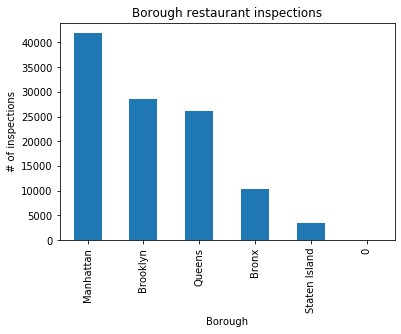

In [13]:
borough_counts.plot.bar()
plt.title("Borough restaurant inspections")
plt.xlabel("Borough")
plt.ylabel("# of inspections")

 In which boroughs are the most/least restaurant inspections?

* Most: Manhattan, Lest: Staten Island

Find the mean score for inspections made in January and the mean score for inspections made in July.

In [14]:
restaurants['INSPECTION DATE'] = pd.to_datetime(restaurants['INSPECTION DATE'])

In [15]:
jan_filter = restaurants['INSPECTION DATE'].dt.month == 1
jul_filter = restaurants['INSPECTION DATE'].dt.month == 7

In [16]:
restaurants[jan_filter]['SCORE'].mean()

20.332909899283187

In [17]:
restaurants[jul_filter]['SCORE'].mean()

26.203096228602604

From these computations, does the mean score seem to depend on the month? Why do you think this might be?

* Yes, because during the summer time restaurants are seems to be more busy and unorganized, which can cause them to be less cleaner than winter.

Make a bar chart of the top 15 cuisine types in the dataset.

Text(0, 0.5, '# of inspections')

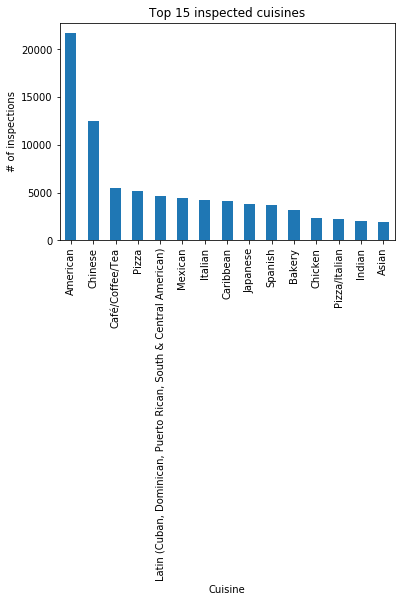

In [19]:
cuisine_counts = restaurants['CUISINE DESCRIPTION'].value_counts()
cuisine_counts.head(15).plot.bar()
plt.title("Top 15 inspected cuisines")
plt.xlabel("Cuisine")
plt.ylabel("# of inspections")

How many different cuisine types are there in the dataset?

In [74]:
len(cuisine_counts)

84

What is the most common street?

In [85]:
street_counts = restaurants['STREET'].value_counts()
street_counts.head(1)

BROADWAY    3805
Name: STREET, dtype: int64